# <font color=blue>Assignments for "Simple Linear Regression"</font>

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**(1)** Investigate the data and do any necessary data cleaning.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize


from pandas.api.types import is_numeric_dtype


import warnings



warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv('data/House_Prices.csv',  low_memory=False)


In [36]:
for col in df:
    print(df[col].name,"= ",df[col].nunique())

Id =  1460
MSSubClass =  15
MSZoning =  5
LotFrontage =  110
LotArea =  1073
Street =  2
Alley =  2
LotShape =  4
LandContour =  4
Utilities =  2
LotConfig =  5
LandSlope =  3
Neighborhood =  25
Condition1 =  9
Condition2 =  8
BldgType =  5
HouseStyle =  8
OverallQual =  10
OverallCond =  9
YearBuilt =  112
YearRemodAdd =  61
RoofStyle =  6
RoofMatl =  8
Exterior1st =  15
Exterior2nd =  16
MasVnrType =  4
MasVnrArea =  327
ExterQual =  4
ExterCond =  5
Foundation =  6
BsmtQual =  4
BsmtCond =  4
BsmtExposure =  4
BsmtFinType1 =  6
BsmtFinSF1 =  637
BsmtFinType2 =  6
BsmtFinSF2 =  144
BsmtUnfSF =  780
TotalBsmtSF =  721
Heating =  6
HeatingQC =  5
CentralAir =  2
Electrical =  5
1stFlrSF =  753
2ndFlrSF =  417
LowQualFinSF =  24
GrLivArea =  861
BsmtFullBath =  4
BsmtHalfBath =  3
FullBath =  4
HalfBath =  3
BedroomAbvGr =  8
KitchenAbvGr =  4
KitchenQual =  4
TotRmsAbvGrd =  12
Functional =  7
Fireplaces =  4
FireplaceQu =  5
GarageType =  6
GarageYrBlt =  97
GarageFinish =  3
GarageCa

In [37]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median())

In [38]:
for n, c in df.items():
        fix_missing(df, c, n)

In [39]:
df["Street"]=pd.get_dummies(df["Street"], drop_first=True)
df["Alley"]=pd.get_dummies(df["Alley"], drop_first=True)
df["Utilities"]=pd.get_dummies(df["Utilities"], drop_first=True)
df["CentralAir"]=pd.get_dummies(df["CentralAir"], drop_first=True)

In [40]:
df["BldgType"]=df.BldgType.replace({'1Fam':0, "2fmCon":1,'Duplex':2, "TwnhsE":3,"Twnhs":4})


In [41]:
df["Heating"].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [42]:
df["Heating"]=df.Heating.replace({'GasA':0, "GasW":1,'Grav':2, "Wall":3,"OthW":4,"Floor":5})


In [43]:
df["Heating"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [44]:
df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [45]:
df["GarageType"]=df.GarageType.replace({'Attchd':0, "Detchd":1,'BuiltIn':2, "CarPort":3,"2Types":4,"Basment":5})

In [46]:
df["GarageType"]

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
5       0.0
6       0.0
7       0.0
8       1.0
9       0.0
10      1.0
11      2.0
12      1.0
13      0.0
14      0.0
15      1.0
16      0.0
17      3.0
18      1.0
19      0.0
20      2.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      1.0
27      0.0
28      0.0
29      1.0
30      1.0
31      0.0
32      0.0
33      0.0
34      0.0
35      2.0
36      0.0
37      0.0
38      1.0
39      NaN
40      0.0
41      0.0
42      0.0
43      1.0
44      0.0
45      0.0
46      0.0
47      0.0
48      NaN
49      0.0
50      0.0
51      1.0
52      3.0
53      0.0
54      1.0
55      0.0
56      0.0
57      0.0
58      2.0
59      1.0
60      1.0
61      1.0
62      0.0
63      1.0
64      0.0
65      2.0
66      0.0
67      0.0
68      0.0
69      0.0
70      0.0
71      1.0
72      0.0
73      0.0
74      1.0
75      2.0
76      1.0
77      1.0
78      NaN
79      1.0
80      0.0
81      0.0
82      0.0
83  

In [47]:
for col in df:
    print(df[col].name,"= ",sum(pd.isnull(df[col])))

Id =  0
MSSubClass =  0
MSZoning =  0
LotFrontage =  0
LotArea =  0
Street =  0
Alley =  0
LotShape =  0
LandContour =  0
Utilities =  0
LotConfig =  0
LandSlope =  0
Neighborhood =  0
Condition1 =  0
Condition2 =  0
BldgType =  0
HouseStyle =  0
OverallQual =  0
OverallCond =  0
YearBuilt =  0
YearRemodAdd =  0
RoofStyle =  0
RoofMatl =  0
Exterior1st =  0
Exterior2nd =  0
MasVnrType =  8
MasVnrArea =  0
ExterQual =  0
ExterCond =  0
Foundation =  0
BsmtQual =  37
BsmtCond =  37
BsmtExposure =  38
BsmtFinType1 =  37
BsmtFinSF1 =  0
BsmtFinType2 =  38
BsmtFinSF2 =  0
BsmtUnfSF =  0
TotalBsmtSF =  0
Heating =  0
HeatingQC =  0
CentralAir =  0
Electrical =  1
1stFlrSF =  0
2ndFlrSF =  0
LowQualFinSF =  0
GrLivArea =  0
BsmtFullBath =  0
BsmtHalfBath =  0
FullBath =  0
HalfBath =  0
BedroomAbvGr =  0
KitchenAbvGr =  0
KitchenQual =  0
TotRmsAbvGrd =  0
Functional =  0
Fireplaces =  0
FireplaceQu =  690
GarageType =  81
GarageYrBlt =  0
GarageFinish =  81
GarageCars =  0
GarageArea =  0
Ga

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   uint8  
 6   Alley          1460 non-null   uint8  
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   uint8  
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,0,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,0,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,0,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,0.0,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,0,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,Norm,0,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,0.0,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,0,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,0,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,0,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,0.0,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,0,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,Norm,0,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,0,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,1.0,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,0,IR1,Lvl,0,FR2,Gtl,NoRidge,Norm,Norm,0,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,0,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,0.0,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
dfcorr=df[["OverallQual","MSSubClass","GarageCars","GarageArea","SalePrice","GrLivArea"]].corr()

In [49]:
df.groupby("Street")["SalePrice"].mean().index

UInt64Index([0, 1], dtype='uint64', name='Street')

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


<BarContainer object of 6 artists>

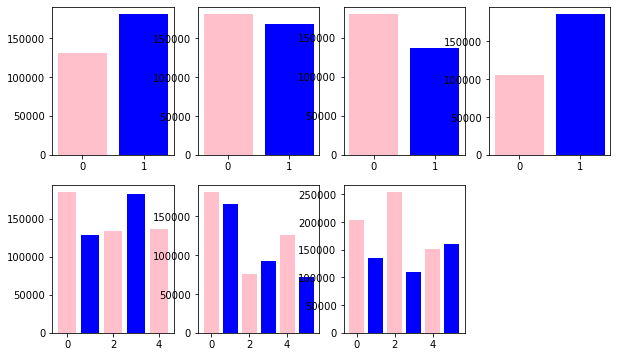

In [48]:
plt.figure(figsize=(10,6))

plt.subplot(2,4,1)
plt.bar(df.groupby("Street")["SalePrice"].mean().index, 
        df.groupby("Street")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,2)
plt.bar(df.groupby("Alley")["SalePrice"].mean().index, 
        df.groupby("Alley")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,3)
plt.bar(df.groupby("Utilities")["SalePrice"].mean().index, 
        df.groupby("Utilities")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,4)
plt.bar(df.groupby("CentralAir")["SalePrice"].mean().index, 
        df.groupby("CentralAir")["SalePrice"].mean(),
        color=("pink","blue"))
plt.xticks([0,1])

plt.subplot(2,4,5)
plt.bar(df.groupby("BldgType")["SalePrice"].mean().index, 
        df.groupby("BldgType")["SalePrice"].mean(),
        color=("pink","blue"))


plt.subplot(2,4,6)
plt.bar(df.groupby("Heating")["SalePrice"].mean().index, 
        df.groupby("Heating")["SalePrice"].mean(),
        color=("pink","blue"))

plt.subplot(2,4,7)
plt.bar(df.groupby("GarageType")["SalePrice"].mean().index, 
        df.groupby("GarageType")["SalePrice"].mean(),
        color=("pink","blue"))

Text(0.5, 1.0, 'Correlation')

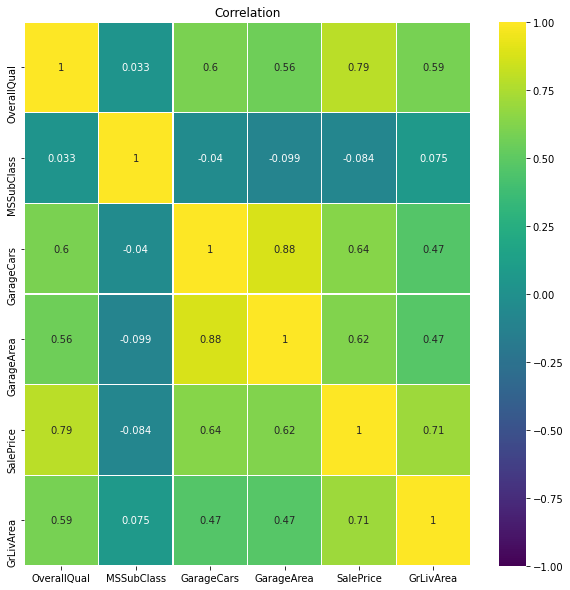

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation")

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [90]:
from sklearn import linear_model
Y = df['SalePrice']
X = df[['Street','CentralAir','Heating',"OverallQual","MSSubClass","GarageCars","GarageArea","GrLivArea"]]

In [91]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [92]:
print('Coefficients: \n', lrm.coef_)
print('Intercept (bias): \n', lrm.intercept_)

Coefficients: 
 [-8.84343223e+02  1.05940570e+04 -1.82511470e+03  2.67071708e+04
 -2.06323845e+02  1.31087826e+04  2.65582484e+01  5.24248250e+01]
Intercept (bias): 
 -94362.02457182729


In [93]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     559.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:46:55   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1451   BIC:                         3.510e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.436e+04   1.68e+04     -5.607      0.000   -1.27e+05   -6.14e+04
Street       -884.3432   1.63e+04     -0.054      0.957   -3.29e+04    3.11e+04
CentralAir   1.059e+04   4853.473      2.183      0.029    1073.484    2.01e+04
Heating     -1825.1147   3739.022     -0.488      0.626   -9159.581    5509.352
OverallQual  2.671e+04   1064.668     25.085      0.000    2.46e+04    2.88e+04
MSSubClass   -206.3238     24.983     -8.259      0.000    -255.330    -157.318
GarageCars   1.311e+04   3061.009      4.283      0.000    7104.307    1.91e+04
GarageArea     26.5582     10.535      2.521      0.012       5.893      47.224
GrLivArea      52.4248      2.519     20.809      0.000      47.483      57.367
==============================================================================
Omnibus:                      430.404   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14278.795
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      18.256   Cond. No.                     3.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""